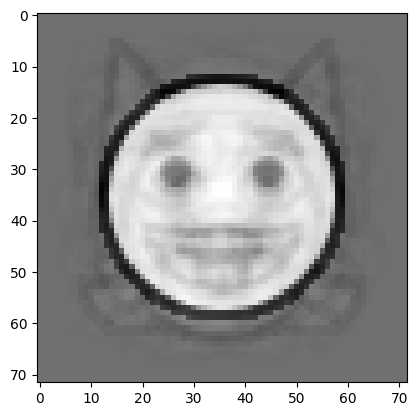

In [321]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import image
import os

folder_path = r"C:\Users\mark.rainey\eigen_emoji\emoji"

m = 72
n = 72
emojis = np.zeros((m*n, 134))
test_emojis = np.zeros(((m*n), 20))
# Make sure to check if the images exist and are read correctly
for i in range(153):
    file_path = os.path.join(folder_path, f"{i}")
    if os.path.exists(file_path):
        # Read the image data
        img_data = image.imread(file_path)
        # Check if the image is not empty or all zeros
        if np.any(img_data):
            # Convert to grayscale by taking the average across the color channels
            grayscale_image = np.mean(img_data[..., :3], axis=2)
            plt.imshow(grayscale_image)# Use ... to include all prior axes
            if i <= 133:
                emojis[:,i]= grayscale_image.reshape(-1)
            else:
                test_emojis[:,134-i]= grayscale_image.reshape(-1)
        else:
            print(f"Image at {file_path} is empty or all zeros.")
    else:
        print(f"File does not exist: {file_path}")
    
avgFace = np.mean(emojis, axis=1)
plt.imshow(np.reshape(avgFace,(m,n)))

X = emojis - np.tile(avgFace, (emojis.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)


(5184, 134)


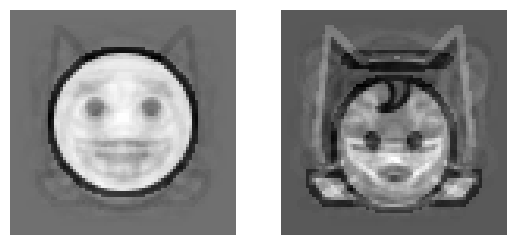

In [322]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgFace,(m,n)))
img_avg.set_cmap('gray')
plt.axis('off')
ax2 = fig1.add_subplot(122)
print(U.shape)
img_u1 = ax2.imshow(np.reshape(U[:,2],(m,n)))
img_u1.set_cmap('gray')
plt.axis('off')

plt.show()

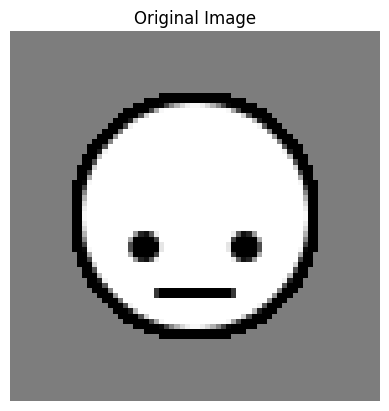

(134,)


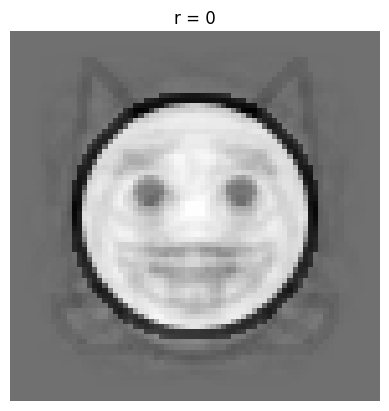

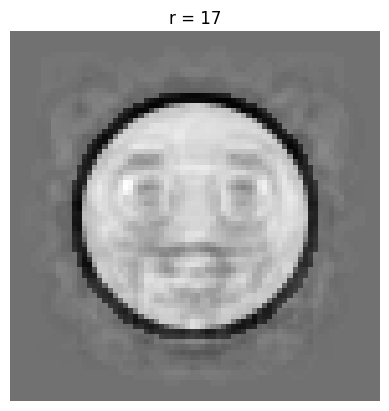

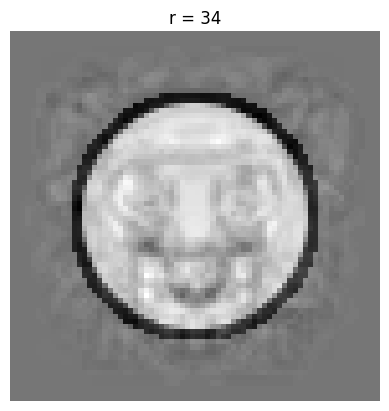

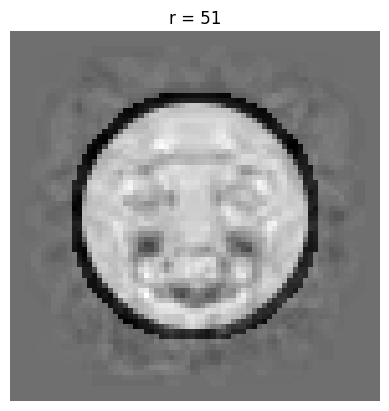

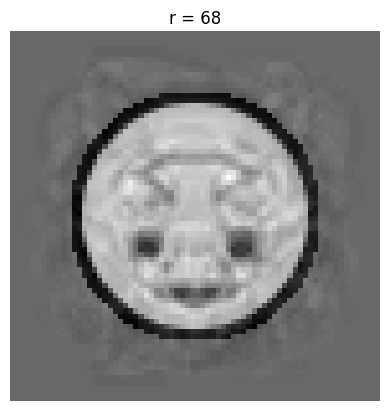

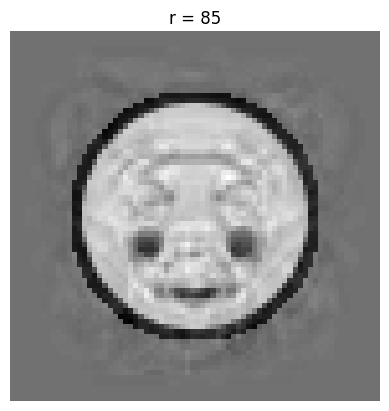

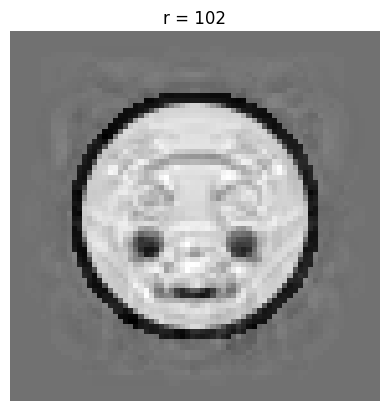

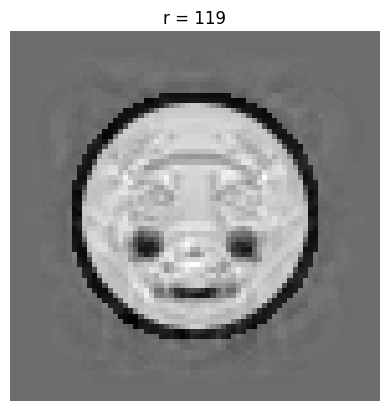

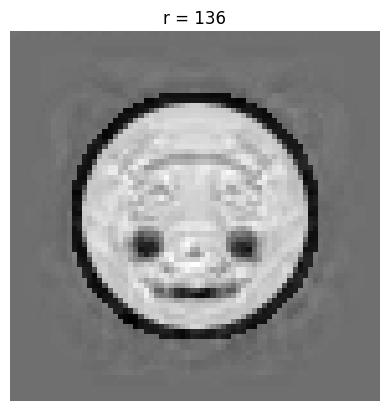

In [328]:
testFace = test_emojis[:,2]
#testFace = emojis[:,1]
plt.imshow(np.reshape(testFace,(m,n)))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

testFaceMS = testFace - avgFace
print(S.shape)
r_list = np.arange(0,144,17)

for r in r_list:
    reconFace = avgFace + U[:,:r]  @ U[:,:r].T @ testFaceMS
    img = plt.imshow(np.reshape(reconFace,(m,n)))
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()

(5184, 1)
(5184, 1)


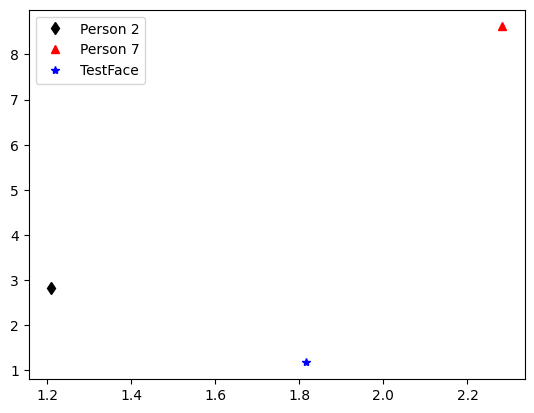

In [329]:
## Project person 2 and 7 onto PC5 and PC6

P1num = 0 # Person number 2
P2num = 7 # Person number 7
T1num = 1

P1 = emojis[:,P1num-1:P1num]
P2 = emojis[:,P2num-1:P2num]
testFace = test_emojis[:,T1num-1:T1num]


P1 = P1 - np.tile(avgFace,(P1.shape[1],1)).T
print(P2.shape)
P2 = P2 - np.tile(avgFace,(P2.shape[1],1)).T

print(testFace.shape)
testFace = testFace - np.tile(avgFace,(testFace.shape[1],1)).T

PCAmodes = [5, 6] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2
PCACoordstF = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ testFace

plt.plot(PCACoordsP1[0,:],PCACoordsP1[1,:],'d',color='k',label='Dark Moon')
plt.plot(PCACoordsP2[0,:],PCACoordsP2[1,:],'^',color='r',label='Person 7')
plt.plot(PCACoordstF[0,:],PCACoordstF[1,:],'*',color='b',label='TestFace')


plt.legend()
plt.show()

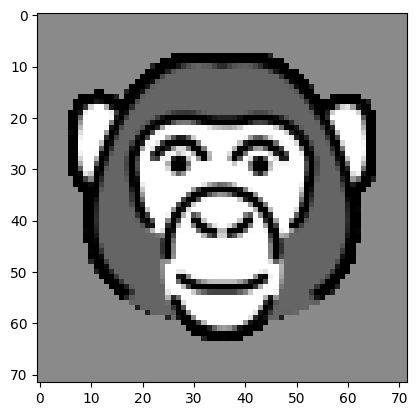

In [334]:
plt.imshow(np.reshape(emojis[:,10],(m,n)))

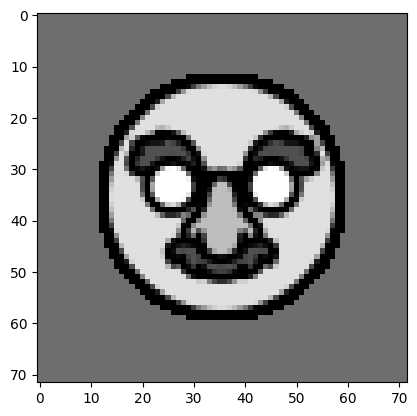

In [331]:
plt.imshow(np.reshape(test_emojis[:,0],(m,n)))